In [ ]:
import pandas as pd
df = pd.read_csv(r"C:\Users\96181\Desktop\MatchMaker data\profiles.csv")
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df['essays'] = (
    df['essay0'].fillna('') + ' ' +
    df['essay1'].fillna('') + ' ' +
    df['essay2'].fillna('') + ' ' +
    df['essay3'].fillna('') + ' ' +
    df['essay4'].fillna('') + ' ' +
    df['essay5'].fillna('') + ' ' +
    df['essay6'].fillna('') + ' ' +
    df['essay7'].fillna('') + ' ' +
    df['essay8'].fillna('') + ' ' +
    df['essay9'].fillna('')
)
df = df.drop(columns=[f"essay{i}" for i in range(10)])

In [ ]:
df = df.drop(columns=['offspring', 'pets', 'religion'])


In [ ]:
df['height'] = df['height'].fillna(df['height'].median())
df['drinks'] = df['drinks'].fillna('unknown')
df['smokes'] = df['smokes'].fillna('unknown')


In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [ ]:
df['age'].min(), df['age'].max()


In [ ]:
df = df[(df['age'] >= 18) & (df['age'] <= 70)]
df['age'].min(), df['age'].max()


In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
df['drinks'].value_counts().plot(kind='bar')
plt.title("Distribution of Drinking Habits")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()


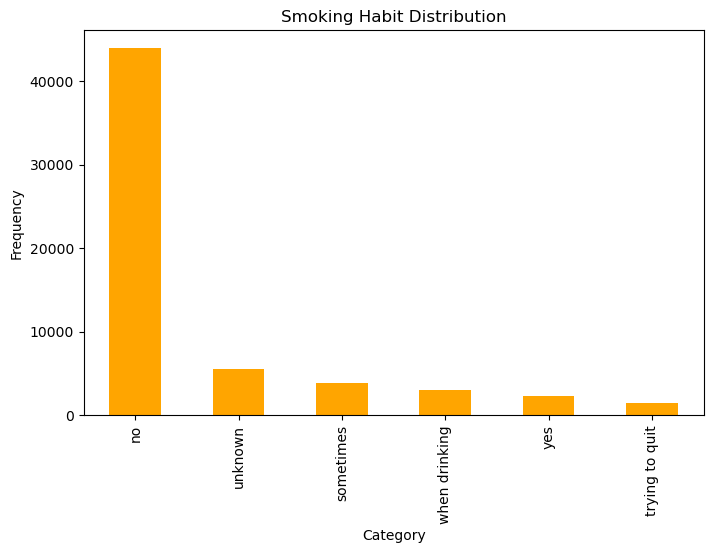

In [145]:
plt.figure(figsize=(8,5))
df['smokes'].value_counts().plot(kind='bar', color='orange')
plt.title("Smoking Habit Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()


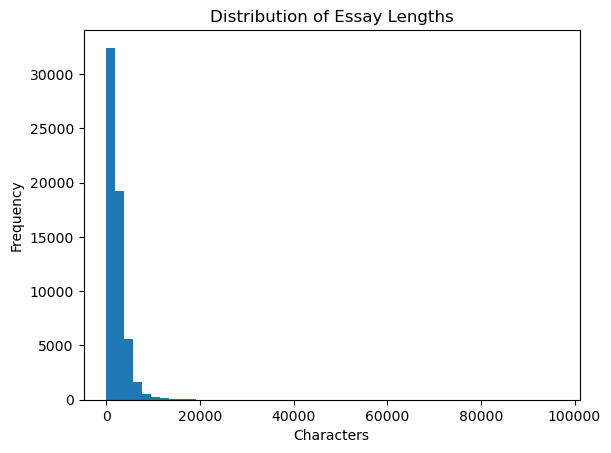

In [146]:
df['essay_length'] = df['essays'].apply(len)

plt.hist(df['essay_length'], bins=50)
plt.title("Distribution of Essay Lengths")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()


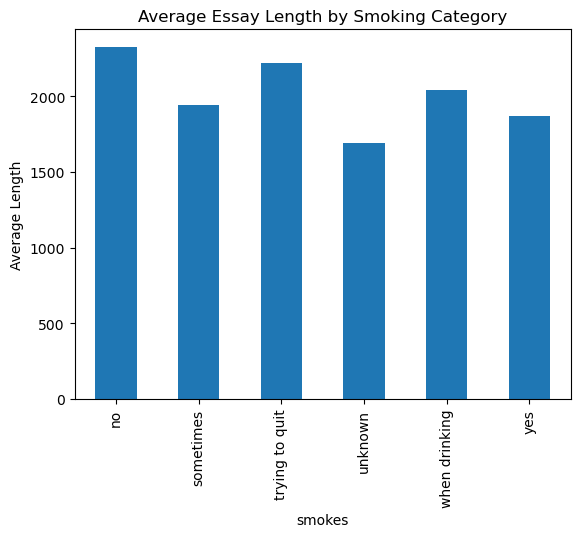

In [147]:
df.groupby('smokes')['essay_length'].mean().plot(kind='bar')
plt.title("Average Essay Length by Smoking Category")
plt.ylabel("Average Length")
plt.show()


In [148]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf(stop_words='english', max_features=5000), 'essays'),
        ('num', StandardScaler(), ['age'])
    ]
)
ml = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [150]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, classification_report
x = df[['essays', 'age']]
y1 = df['status']
x_train,x_test,y1_train,y1_test = tts(
    x,y1,test_size = 0.2, random_state = 39,stratify = y1
)
ml.fit(x_train,y1_train)
y1_pred = ml.predict(x_test)
print(" Accuracy: \n", accuracy_score(y1_test, y1_pred))
print(" Classification Report: \n", classification_report(y1_test, y1_pred))

 Accuracy: 
 0.9314371507214947
 Classification Report: 
                 precision    recall  f1-score   support

     available       0.65      0.12      0.21       373
       married       0.00      0.00      0.00        62
seeing someone       0.50      0.00      0.01       413
        single       0.93      1.00      0.96     11139
       unknown       0.00      0.00      0.00         2

      accuracy                           0.93     11989
     macro avg       0.42      0.23      0.24     11989
  weighted avg       0.90      0.93      0.90     11989



C:\Users\96181\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\96181\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\96181\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


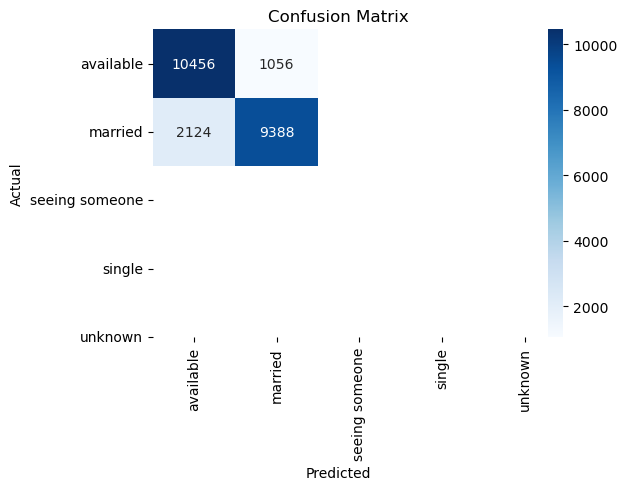

In [151]:
cm1 = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=ml.classes_,
            yticklabels=ml.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [152]:
df = df[df['status'].isin(['single','available','seeing someone','married'])]


df['status'] = df['status'].replace({
    'available': 'single',
    'seeing someone': 'not_single',
    'married': 'not_single'
})


df['status'].value_counts()


status
single        57560
not_single     2374
Name: count, dtype: int64

In [18]:
from sklearn.utils import resample


single_df = df[df['status'] == 'single']
not_df = df[df['status'] == 'not_single']


not_upsampled = resample(
    not_df,
    replace=True,
    n_samples=len(single_df),
    random_state=39
)

df_balanced = pd.concat([single_df, not_upsampled])


df_balanced = df_balanced.sample(frac=1, random_state=39)




In [153]:
print(df_balanced['status'].value_counts())

status
single        57560
not_single    57560
Name: count, dtype: int64


In [154]:
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


X = df_balanced[['essays', 'age']]
y = df_balanced['status']
X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, random_state=39, stratify=y
)

In [155]:
df_balanced['status'].value_counts()


status
single        57560
not_single    57560
Name: count, dtype: int64

In [ ]:
ml.fit(X_train, y_train)
y_pred = ml.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import joblib

joblib.dump(model, "matchmaker_model.pkl")
